

# Project: Investigate a Dataset - [TMDB DATASET]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It contains several columns such as cast, director, year of release, pouplarity and so on.


### Question(s) for Analysis
1. The revenue change from year to year.
2. What kind of properties affects the revenues.
3. The top ten movies in terms of profit.
4. Movies with shortest and longest runtimes
5. Which year has the highest number of releases


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



### Data Cleaning

 

We can further explore the dataset to get more of the properties


In [4]:
# We get the shape of the dataset
df_movies.shape

(10866, 21)

The above result shows the dataset has 10866 rows and 21 columns

In [5]:
# WE can explore the different datatypes in the dataset
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# We can further explore the data set
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see from the result above that there are some missing rows in the data set.

### Cleaning The Data

In [7]:
# We can check for duplicates in the dataset
df_movies.duplicated().sum()

1

This shows that there is one duplicated row in the data set. We can go ahead and drop the
duplicated row.

In [8]:
# Drop duplicated row
df_movies.drop_duplicates(inplace = True)
# we check to see if the row was dropped
df_movies.duplicated().sum()

0

In [9]:
# We then can check for the null values in the dataset
df_movies.isnull().sum().sum()

13433

This shows that there are 13433 NaN values in our dataset. We can drop the columns with the
missing values.

In [10]:
# Drop null values
df_movies.dropna(inplace = True)

In [11]:
# We check to see if the null values were dropped
df_movies.isnull().sum().sum()

0

In [12]:
# We can now recheck the shape to see our new shape
df_movies.shape

(1992, 21)

For the sake of this analysis and the questions posed above, there are some columns in the
dataset that we do not need, we can go ahed and drop those columns.

In [13]:
#we make the columns to be dropped into a list
columns_to_drop = ['id', 'imdb_id','homepage', 'tagline','keywords','overview','budget_adj','revenue_adj']
# we drop said columns
df_movies.drop(columns = columns_to_drop,axis = 1, inplace = True)
#we confirm the dropped columns
df_movies.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [14]:
# We can check the relevant statistics related to the data
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687
std,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224
min,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000
25%,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000
50%,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000
75%,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000


From the above, we can see there are movies with minimum runtime of 0, budgets of 0 ,and revenues of zero. This does not make sense as there can't be a movie with zero runtime. We can attempt to drop those movies.

In [15]:
# drop the movies withe zero runtime, budget or revenues.
zero_runtime_movies = df_movies.query('runtime == 0 or budget == 0 or revenue == 0').index
df_movies.drop(zero_runtime_movies, axis = 0, inplace = True )

In [16]:
#check to see if they were dropped
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


In [19]:
df_movies.shape

(1287, 13)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (The revenue change from year to year)

release_year
1961    4.000000e+06
1962    5.960000e+07
1963    7.889876e+07
1964    6.295027e+07
1965    1.411957e+08
1967    1.115848e+08
1969    8.197449e+07
1971    4.588650e+07
1972    2.450664e+08
1973    3.015420e+08
1974    9.757200e+07
1975    1.961918e+08
1977    4.804183e+08
1978    1.055000e+08
1979    1.026729e+08
Name: revenue, dtype: float64

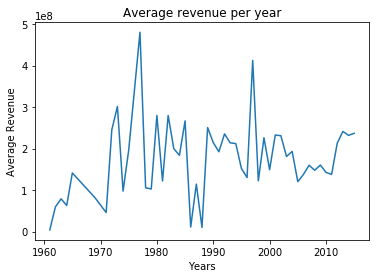

In [20]:
#We get the revenues for each year

revenue = df_movies.groupby('release_year')['revenue'].mean()
# We can then plot a line chart showing each year and its revenue
plt.plot(revenue)
plt.title('Average revenue per year')
plt.xlabel("Years")
plt.ylabel("Average Revenue")
revenue.head(15)

Text(0,0.5,'Average Revenue')

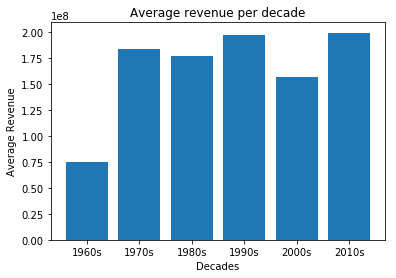

In [21]:
#Split the data into decades
# bin_edges = 
# bin_labels = 
df_movies['decades'] = pd.cut(x = df_movies['release_year'], bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020] , 
                    labels= ['1960s','1970s', '1980s', '1990s', '2000s', '2010s'])
# We can the plot a barchart for the change in revenues per decade
decade_revenue = df_movies.groupby('decades')['revenue'].mean()
plt.bar(decade_revenue.index, decade_revenue.values)
plt.title('Average revenue per decade')
plt.xlabel("Decades")
plt.ylabel("Average Revenue")

We can see the average revenue hits it's peak in the 2010s and it's lowest in the 1960s

### Research Question 2  (What Kind Of properties affect the revenue)

In this question, we are going to be focused on three columns, namely the popularity, vote_average and budget,and see how they affectmovies with relatively high revenue so a person making a movie can have an idea on what to do.


In [22]:
#to get movies with high revenue
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


We can say movies that are above the 75 % percentile are high revenue movies

In [25]:
# Extract movies with revenues greater than the 75th percentile
high_rev = df_movies.revenue.quantile(.75)
# Select all movies with revenues greater than the 75th percentile
high_rev_df = df_movies.query('revenue > {}'.format(high_rev))

Now we compare the high revenues to the three properties.

In [46]:
#we define a fuction for the scatterplots
def scatter_plot(x_axis,y_axis,title,x_label,y_label):
    plt.scatter(x = x_axis, y = y_axis, alpha = 0.3, s= 30)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

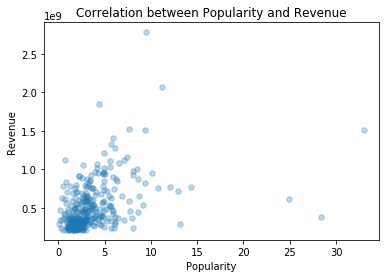

In [47]:
# draw the scatterplot comparing the popularity to revenue
scatter_plot(high_rev_df.popularity,high_rev_df.revenue,"Correlation between Popularity and Revenue","Popularity", "Revenue")

 We can then calculate the correlation between the properties. A correlation of 1 implies high correlation, while a correlation of 0 implies zero correlation.

In [27]:
#we calculate the correlation between poularity and revenue
high_rev_df[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.000000,0.411385
revenue,0.411385,1.000000


The graph shows low positive correlation between the popularity and the revenue, and the value 0.411 we got from the correlation also shows a low correlation between them. 

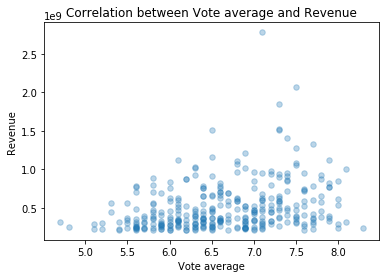

In [48]:
# draw the scatterplot comparing the vote_average to revenue
scatter_plot(high_rev_df.vote_average,high_rev_df.revenue,"Correlation between Vote average and Revenue","Vote average", 
             "Revenue")

In [29]:
#we calculate the correlation between vote_average and revenue
high_rev_df[['vote_average','revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.289204
revenue,0.289204,1.000000


The graph doesn't show any type of correlation and the value we calculated is 0.289 which shows a weak correlation between them

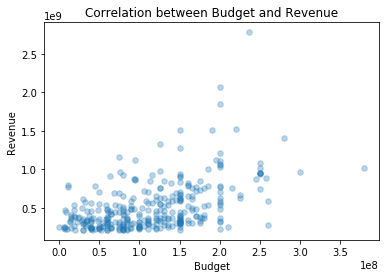

In [49]:
# draw the scatterplot comparing the budget to revenue
scatter_plot(high_rev_df.budget,high_rev_df.revenue,"Correlation between Budget and Revenue","Budget", 
             "Revenue")

In [31]:
#we calculate the correlation between budget and revenue
high_rev_df[['budget','revenue']].corr()

,budget,revenue
budget,1.000000,0.494832
revenue,0.494832,1.000000


The graph shows moderate positive correlation between the popularity and the revenue, and the value 0.494 from the correlation also shows amoderate correlation between them.

### Research Question 3 (Top ten movies in terms of profit)

To do this we have to get the profit. And we can get this by subtracting the revenue from the budget.

In [32]:
#we create the profit column
df_movies['profit'] = df_movies['revenue'] - df_movies['budget']
df_movies.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,decades,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,2010s,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2010s,228436354


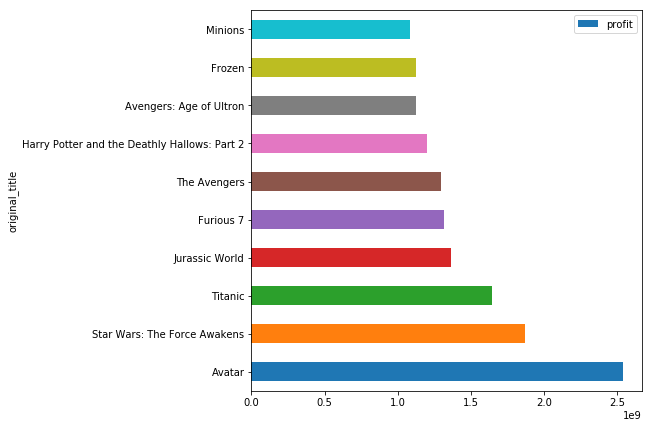

In [38]:
# to get the top 10 movies with the highest profits, we sort according to the profit column. We can  create a function that gets
#all the top ten we want. 
def top_ten(column_name):
    top_10 = df_movies.sort_values(by = [column_name], ascending = False)
    #reset index values
    top_10 = top_10.reset_index()
    #get top ten movies
    top_tens = top_10.loc[0:9]
    #plot the bar graph
    top_tens.plot(kind = 'barh' , x = 'original_title', y = column_name, figsize = (7,7))
top_ten('profit')

We can see that Avatar is the movie with the highest profit.

### Research Question 4 (Movies with the shortest and longest runtimes)

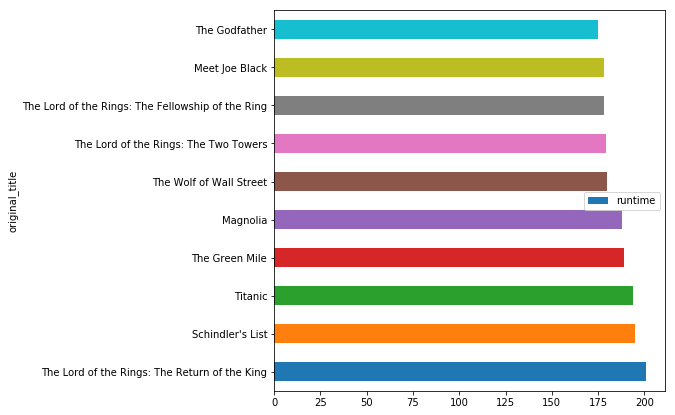

In [39]:
# We can call the function top_ten from the above
top_ten('runtime')

WE can see from the bar chart above that the Lord of the rings: The Return of The King has the highest runtime.

To get the movie with the lowest run time, we define another function


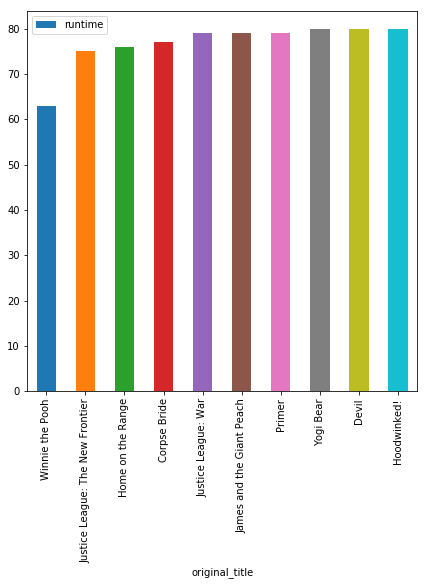

In [42]:
def bottom_ten(column_name):
    bottom_10 = df_movies.sort_values(by = [column_name], ascending = True)
    #sort the index values
    bottom_10 = bottom_10.reset_index()
    #get bottom ten movies
    bottom_tens = bottom_10.loc[0:9]
    #plot the bar graph
    bottom_tens.plot(kind = 'bar' , x = 'original_title', y = column_name, figsize = (7,7))
bottom_ten('runtime')

We can see that Winnie the Pooh has the shortest runtime.

### Research Question 5 (Which Year has the highest number of releases)

In [54]:
# we make a group for each year and count the number of movies in each year 
data=df_movies.groupby('release_year').count()['runtime']
data.head(10)

release_year
1961    1
1962    1
1963    1
1964    2
1965    1
1967    1
1969    1
1971    4
1972    1
1973    2
Name: runtime, dtype: int64

Text(0,0.5,'Number Of Movies')

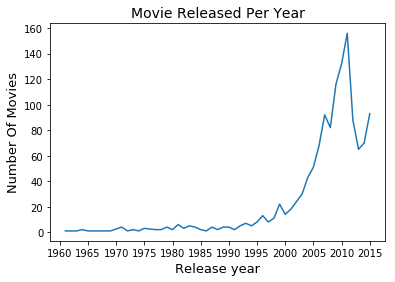

In [51]:
#we plot the graph
data.plot(xticks = np.arange(1960,2016,5))
plt.title("Movie Released Per Year",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

We can see that the year with the most movies released is 2011.


<a id='conclusions'></a>
## Conclusions

1. The year with the highest average revenue is 1977 while the year with the least average revenue is 1961. Also the deacade with the most average revenue is the 2010s while the 1960s has the least amount of average revenues in all the decades.
2. The propertiy which mostly affects the revenue is the budget which has the highest positive corelation with the revenue.
3. The top ten movies in terms of profit are Avatar, Star Wars: THe Force Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows:Part 2, Avengers:age of Ultron, Frozen, Minions.
4. The movie with the highest runtime is Lord Of the Rings: The Return of the King, while the movie with the shortest runtime is Winnie the Pooh.
5. The Year with the highest number of movie releases is 2011.


The limitation of this resarch is that during data cleaning, a lot of columns containing NaN values were dropped which reduced the shape from (10866, 21) to(1992, 13). This may mean that this analysis isn't as comprehensive as it could be.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])